# (Non) Conditional Gaussian Simulation: 
##	 Turning Bands 2D Spherical Covariance Example on Python

Author: Esteban Jiménez 
<br>
November, 2017.


The goal of this project is to understand the turning bands algorithm for generating gaussian random function. All functions were programed 
<br>
by the author following the ideas of Lantuéjoul (1994).

In [1]:
from Turning_bands_2D_Isotropic_Fx import*
import matplotlib.pyplot as plt

            # Parameters #
            
nbands = 500           # Number of bands
xf = 10.0               # Maximum x coordinate
yf = 10.0               # Maximum y coordinate
nx = 100.0              # Number of nodes for x and y axes
a = 2.0                 # Range of the spherical covariance
l = 100.0               # Band's length
n_points = 300          # Number of point to sample for Sk and CS
nsim = 1                # Number of Simulations

For the sake of this exercise a non-conditional simulation is regarded as the "reality". The latter is created as follows:

In [2]:
y_reality = non_cond_sim(nbands, xf, yf, nx, a, l, 1, 0) 

By sampling this reality, a simple kriging interpolation is performed.

In [3]:
samples = sampling(y_reality,n_points)                                  # Sampling of the "reality"
Lambdas, y_sk = skrig(samples,y_reality,a)                              # Simple kriging using the samples


Lastly, a realization of the gaussian function, conditioned to the simple kriging estimates, is generated.

In [4]:
y_cs = cond_sim(samples, y_sk, Lambdas, a, l, nbands, nsim)  # Simulation conditioned to the data


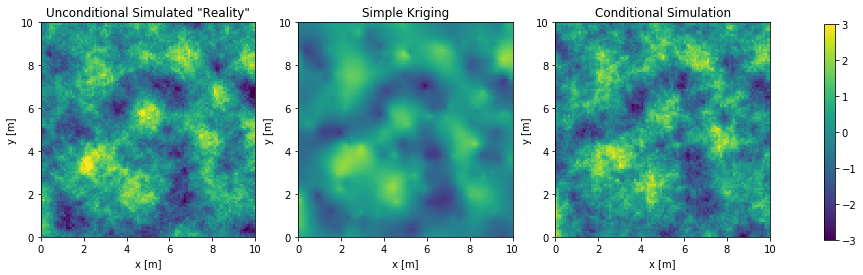

In [5]:
plot_3subplots(y_reality, y_sk, y_cs, nx, 'Unconditional Simulated "Reality"', 'Simple Kriging' , 'Conditional Simulation')

## References

Lantuéjoul, C. 1994. Non Conditional Simulation of Stationary Isotropic Multigaussian Random Functions. On Geostatitical Simulations. Proceedings of the Geostatistical Simulation Workshop, Fontainebleau, France, 37-28 May 1993.